# Surface contour plotter

Plot the results for single metric parameter sweep given that the first two columns are parameters.

### Load packages

In [10]:
import numpy as np
from matplotlib  import cm
import matplotlib.pyplot as plt
import matplotlib.mlab as ml
import sys

### Parameters



In [11]:
# Set an artifical minimum for the metric value(s)
epsilon = 1.0e-6
# interactive mode for plotting to screen
iPlotInteractive = True
# default results file
results_file_name_default = 'results.txt'

### Set filenames with correct directory structure

In [12]:
# output dir for results including the parent directory
output_dir = '../output/'
# script dir for results including the parent directory
script_dir = '../script/'

# default results file location
results_file_name = output_dir + results_file_name_default


### Results file name

Determine results file name - either entered as an argument to the python call here, or default to "results.txt"


In [13]:
thisCodeName = 'SurfacePlotter.py'
nLength = len(thisCodeName)
tailString = sys.argv[0]
tailString = tailString[-nLength:]
if(tailString==thisCodeName):
    if(len(sys.argv)>1):
        # next should be the file name
        results_file_name = sys.argv[1]
    # next should be the output directory name
    if(len(sys.argv)>2):
        output_dir = sys.argv[2]
    # next should be the script directory name
    if(len(sys.argv)>3):
        script_dir = sys.argv[3]
    iPlotInteractive = False
    results_file_name = output_dir + results_file_name

## Read results data

In [14]:
lines = [line.rstrip('\n') for line in open(results_file_name)]

# first line is header line (remove $ from marker as well)
header_line = lines[0].replace('$', '')
header_line = header_line.split(',')

# assume only two parameters for now
n_data = len(lines)-1

# loop over data
x = []
y = []
# least squares metric
z = []
zmin = 1.0e10
for i in range(n_data):
    columns = np.fromstring(lines[i+1].strip(), dtype=float, sep=',')
    x.append(float(columns[0]))
    y.append(float(columns[1]))
    z.append(float(columns[2]))
    z[-1]=z[-1]+epsilon # add epsilon in case of log10(0) issue
    if(z[-1]<zmin):
        zmin = z[-1]
        xAtMin = x[-1]
        yAtMin = y[-1]
xplotmax = max(x)
yplotmax = max(y)
xplotmin = min(x)
yplotmin = min(y)

### Plot axes labels

Determine x and y parameter names

In [15]:
x_name = header_line[0]
y_name = header_line[1]

### Best fit

In [16]:
print 'Surface plotter with best fit: ',xAtMin, yAtMin, zmin

Surface plotter with best fit:  0.0125 0.0 3.49458000986e-05


## Plot

### Plotter setup

Overall resolution, aesthetic buffer around plot region and enter interactive mode (if requested)

In [17]:
# set overall data resolution
ny, nx = 100, 100

# buffer settings
bufFactor = 100.
bufX = (xplotmax - xplotmin)/bufFactor
bufY = (yplotmax - yplotmin)/bufFactor

# set to interactive mode
if(iPlotInteractive):
    %matplotlib inline

### Output plot

Output to pdf - also to screen if interactive mode set above

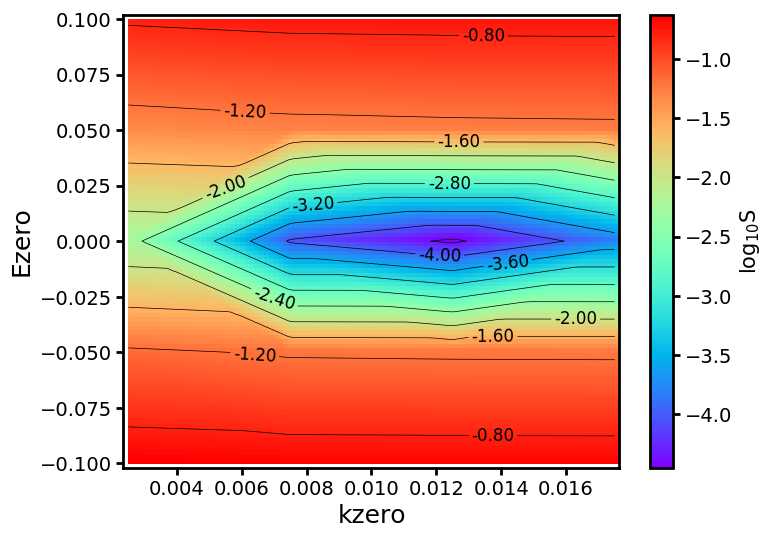

In [18]:
deltax = (xplotmax - xplotmin)/float(nx)
deltay = (yplotmax - yplotmin)/float(ny)
xmin = xplotmin-bufX
xmax = xplotmax+bufX
ymin = yplotmin-bufY
ymax = yplotmax+bufY
xi = np.arange(xmin-bufX, xmax+bufX, deltax)
yi = np.arange(ymin-bufY, ymax+bufY, deltay)
zlog = np.log10(z)
#zi = ml.griddata(x, y, zlog, xi, yi, interp='nn') # 'nn' for incomplete data; 'linear' if complete
zi = ml.griddata(x, y, zlog, xi, yi, interp='linear') # 'nn' for incomplete data; 'linear' if complete

plt.figure(figsize=(8,6),dpi=100)
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.minor.width'] = 2
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['ytick.minor.width'] = 2
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['contour.negative_linestyle'] = 'solid'
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
CS = plt.contour(xi, yi, zi, 10, linewidths = 0.5, colors = 'k')
# Define a class that forces representation of float to look a certain way
# This remove trailing zero so '1.0' becomes '1'
class nf(float):
    def __repr__(self):
        str = '%.2f' % (self.__float__(),)
        if str[-1] == '0':
            return '%.2f' % self.__float__()
        else:
            return '%.2f' % self.__float__()

# Recast levels to new class
CS.levels = [nf(val) for val in CS.levels]

# Label levels with specially formatted floats
if plt.rcParams["text.usetex"]:
    fmt = r'%r'
else:
    fmt = '%r'
plt.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=12)
#plt.clabel(CS, inline=1, fontsize=10)
plt.pcolormesh(xi, yi, zi, cmap = plt.get_cmap('rainbow'))
plt.colorbar().set_label(label='log$_{10}$S',size=15)
# lit values
#plt.scatter(0.0115, 0.217, marker = 'o', c = 'white', s = 100, zorder = 10)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
# change x/y labels
plt.xlabel(x_name, fontsize=18)
plt.ylabel(y_name, fontsize=18)
#plt.xlabel("k$^0$ (cm s$^{-1}$)",fontsize=18)
#plt.ylabel("E$^0$ (V)",fontsize=18)
# save figures to PDF and png
plt.savefig(output_dir + "surface_plot.pdf", dpi=400)
plt.savefig(output_dir + "surface_plot.png", dpi=400)
if(iPlotInteractive):
    plt.show()